# 📘 Panel Data: Investment Modeling using Separate Regressions and SUR
This notebook walks through:
- Loading panel data
- Visualizing relationships
- Running separate OLS regressions per industry
- Estimating a dummy-variable-based SUR-style model

In [1]:
# 📦 Load the required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Load the dataset
df = pd.read_csv("Panel_Investment_Data.csv")
df.head()

,Industry,Year,Net_Profit,Capital_Stock,Planned_Investment
0,Steel,2010,120,1000,60
1,Steel,2011,135,1100,68
2,Steel,2012,150,1200,75
3,Steel,2013,170,1300,82
4,Steel,2014,160,1250,80


## 🔍 Dataset Structure
We are analyzing planned investments across Steel and Cement industries over 10 years.

In [2]:
# View a summary by industry
df['Industry'].value_counts()

Industry
Steel     10
Cement    10
Name: count, dtype: int64

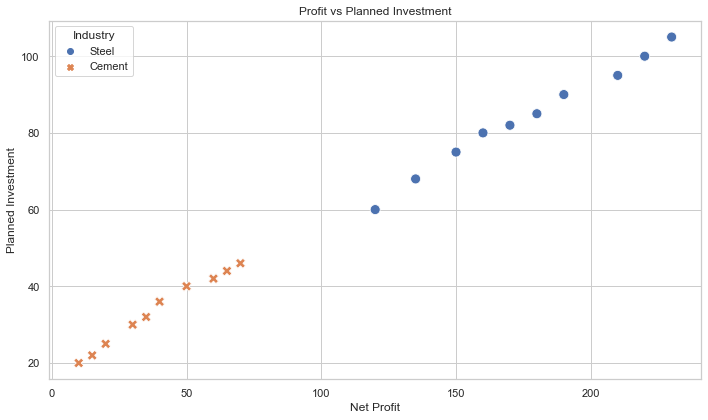

In [3]:
# 📊 Plot: Net Profit vs Planned Investment
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Net_Profit', y='Planned_Investment', hue='Industry', style='Industry', s=100)
plt.title("Profit vs Planned Investment")
plt.xlabel("Net Profit")
plt.ylabel("Planned Investment")
plt.tight_layout()
plt.show()

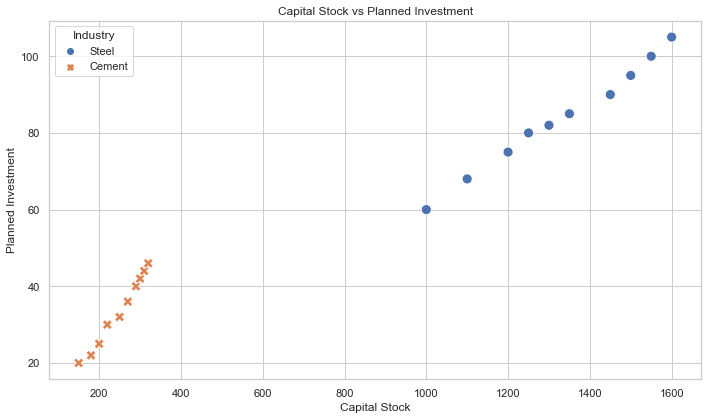

In [4]:
# 📊 Plot: Capital Stock vs Planned Investment
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Capital_Stock', y='Planned_Investment', hue='Industry', style='Industry', s=100)
plt.title("Capital Stock vs Planned Investment")
plt.xlabel("Capital Stock")
plt.ylabel("Planned Investment")
plt.tight_layout()
plt.show()

## 🧮 Run Separate Regressions per Industry
We fit an OLS regression for each industry to check if the coefficients differ.

In [5]:
results = {}
for industry in df['Industry'].unique():
    industry_df = df[df['Industry'] == industry]

    # Here, we model Investment as a function of Net Profit and Capital Stock.
    # This model assumes all other factors are captured by the error term.
    model = smf.ols("Planned_Investment ~ Net_Profit + Capital_Stock", data=industry_df).fit()

    results[industry] = model

    print(f"\nRegression Summary for {industry} Industry:")
    print(model.summary())


Regression Summary for Steel Industry:
                            OLS Regression Results                            
Dep. Variable:     Planned_Investment   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     568.7
Date:                Mon, 26 May 2025   Prob (F-statistic):           1.79e-08
Time:                        11:05:15   Log-Likelihood:                -14.637
No. Observations:                  10   AIC:                             35.27
Df Residuals:                       7   BIC:                             36.18
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Interc

/Users/varunnkaushik/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/varunnkaushik/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## 🔁 Combined Regression with Dummy Variables (SUR-style)
We now estimate a model that allows intercepts and slopes to differ by industry by including dummy variables and interaction terms.

In [6]:
# Create dummy and interaction variables
df['Cement_Dummy'] = (df['Industry'] == 'Cement').astype(int)
df['Profit_Cement'] = df['Net_Profit'] * df['Cement_Dummy']
df['Capital_Cement'] = df['Capital_Stock'] * df['Cement_Dummy']

# Run the SUR-style model using OLS
formula = "Planned_Investment ~ Cement_Dummy + Net_Profit + Profit_Cement + Capital_Stock + Capital_Cement"
combined_model = smf.ols(formula, data=df).fit()

print("Combined SUR-style Model Summary:")
print(combined_model.summary())

Combined SUR-style Model Summary:
                            OLS Regression Results                            
Dep. Variable:     Planned_Investment   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2975.
Date:                Mon, 26 May 2025   Prob (F-statistic):           1.16e-20
Time:                        11:05:16   Log-Likelihood:                -25.036
No. Observations:                  20   AIC:                             62.07
Df Residuals:                      14   BIC:                             68.05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept 